## Historic and Projected Rainfall and Runoff for 4 Lake Victoria Sub-Regions

* Loading the Dataset

* Missing values

* Data standardization

* Preliminary Exploratory Data Analysis.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Loading the Dataset

In [20]:
df = pd.read_excel("messy-data.xlsx")
df.head()

,Unnamed: 0,Seasonal rainfall in Lake Victoria and Simiyu,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,"Month, period",Lake Victoria,Simiyu
2,NaN,"Jan,2001-2019",3.176mm,2.908474
3,NaN,"Feb,2001-2019",3.477mm,1.8mm
4,NaN,"Mar,2001-2019",4.687053,2.981053


In [21]:
df = pd.read_excel("messy-data.xlsx", skiprows=2)

In [22]:
df.head()

,Unnamed: 0,"Month, period",Lake Victoria,Simiyu
0,NaN,"Jan,2001-2019",3.176mm,2.908474
1,NaN,"Feb,2001-2019",3.477mm,1.8mm
2,NaN,"Mar,2001-2019",4.687053,2.981053
3,NaN,"Apr,2001-2019",7.004526,4.753579
4,NaN,"May,2001-2019",9.362789,4.077474


In [23]:
df = pd.read_excel("messy-data.xlsx", skiprows=2, usecols='B:D')
df.head(100)

,"Month, period",Lake Victoria,Simiyu
0,"Jan,2001-2019",3.176mm,2.908474
1,"Feb,2001-2019",3.477mm,1.8mm
2,"Mar,2001-2019",4.687053,2.981053
3,"Apr,2001-2019",7.004526,4.753579
4,"May,2001-2019",9.362789,4.077474
5,"Jun,2001-2019",3.430211,1.046947
6,"Jul,2001-2019",1.764421,0.195211
7,"Aug,2001-2019",2.812632,0.333632
8,"Sep,2001-2019",3.978895,1.205842
9,"Oct,2001-2019",5.318421,2.454737


### Missing value

In [24]:
df.dropna(inplace = True, axis = 0)

In [25]:
df.head(20)

,"Month, period",Lake Victoria,Simiyu
0,"Jan,2001-2019",3.176mm,2.908474
1,"Feb,2001-2019",3.477mm,1.8mm
2,"Mar,2001-2019",4.687053,2.981053
3,"Apr,2001-2019",7.004526,4.753579
4,"May,2001-2019",9.362789,4.077474
5,"Jun,2001-2019",3.430211,1.046947
6,"Jul,2001-2019",1.764421,0.195211
7,"Aug,2001-2019",2.812632,0.333632
8,"Sep,2001-2019",3.978895,1.205842
9,"Oct,2001-2019",5.318421,2.454737


In [26]:
df.duplicated().sum()

0

### Data standardization

In [28]:
splitted_columns =df["Month, period"].str.split(",",expand=True)
splitted_columns

,0,1
0,Jan,2001-2019
1,Feb,2001-2019
2,Mar,2001-2019
3,Apr,2001-2019
4,May,2001-2019
5,Jun,2001-2019
6,Jul,2001-2019
7,Aug,2001-2019
8,Sep,2001-2019
9,Oct,2001-2019


In [29]:
df["Month"]  = splitted_columns[0]
df["Period"] = splitted_columns[1]
df.head()

,"Month, period",Lake Victoria,Simiyu,Month,Period
0,"Jan,2001-2019",3.176mm,2.908474,Jan,2001-2019
1,"Feb,2001-2019",3.477mm,1.8mm,Feb,2001-2019
2,"Mar,2001-2019",4.687053,2.981053,Mar,2001-2019
3,"Apr,2001-2019",7.004526,4.753579,Apr,2001-2019
4,"May,2001-2019",9.362789,4.077474,May,2001-2019


In [30]:
# lets drop Month and Period columns 
df.drop(columns = ["Month, period"], inplace = True)

In [31]:
df.head()

,Lake Victoria,Simiyu,Month,Period
0,3.176mm,2.908474,Jan,2001-2019
1,3.477mm,1.8mm,Feb,2001-2019
2,4.687053,2.981053,Mar,2001-2019
3,7.004526,4.753579,Apr,2001-2019
4,9.362789,4.077474,May,2001-2019


In [34]:
# Some columns contain the string mm, so I define a function, which eliminates it.
def remove_mm(x):
    if type(x) is str:
        return x.replace("mm", "")
    else:
        return x

# I apply the function to the columns

df["Lake Victoria"] = df["Lake Victoria"].apply(remove_mm)
df["Simiyu"] = df["Simiyu"].apply(remove_mm)

In [35]:
df.head(20)

,Lake Victoria,Simiyu,Month,Period
0,3.176,2.908474,Jan,2001-2019
1,3.477,1.8,Feb,2001-2019
2,4.687053,2.981053,Mar,2001-2019
3,7.004526,4.753579,Apr,2001-2019
4,9.362789,4.077474,May,2001-2019
5,3.430211,1.046947,Jun,2001-2019
6,1.764421,0.195211,Jul,2001-2019
7,2.812632,0.333632,Aug,2001-2019
8,3.978895,1.205842,Sep,2001-2019
9,5.318421,2.454737,Oct,2001-2019


In [37]:
# I describe type of each column

df.dtypes

Lake Victoria    object
Simiyu           object
Month            object
Period           object
dtype: object

In [38]:
# The Lake Victoria and Simiyu columns are of type object, so I convert them to type float

df["Lake Victoria"] = df["Lake Victoria"].astype(float)
df["Simiyu"] = df["Simiyu"].astype(float)

#df["Lake Victoria"] = pd.to_numeric(df["Lake Victoria"])
# df["Simiyu"] = pd.to_numeric(df["Simiyu"]


In [39]:
df.dtypes

Lake Victoria    float64
Simiyu           float64
Month             object
Period            object
dtype: object

###  Preliminary Exploratory Data Analysis

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lake Victoria  12 non-null     float64
 1   Simiyu         12 non-null     float64
 2   Month          12 non-null     object 
 3   Period         12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 480.0+ bytes


In [41]:
df.describe()

,Lake Victoria,Simiyu
count,12.000000,12.000000
mean,4.524877,2.394868
std,2.037278,1.489300
min,1.764421,0.195211
25%,3.366658,1.166118
50%,4.073500,2.681605
75%,5.168461,3.291079
max,9.362789,4.753579


<AxesSubplot:>

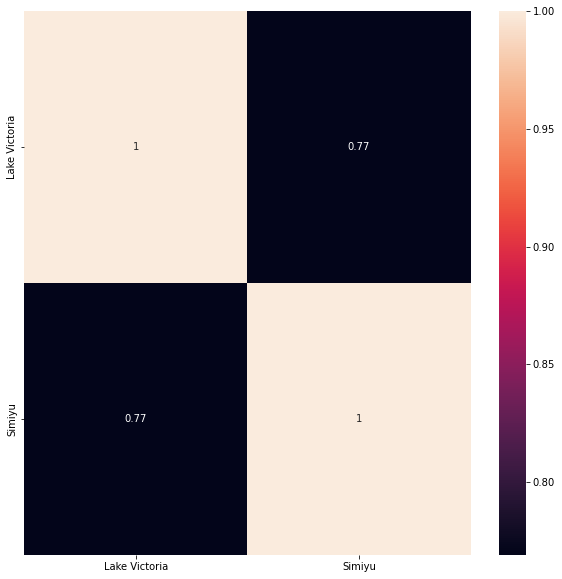

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Month', ylabel='Lake Victoria'>

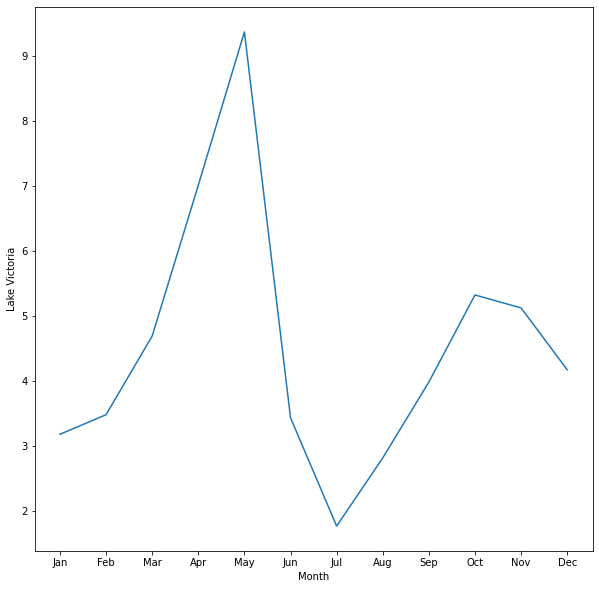

In [45]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Month", y="Lake Victoria", data=df)

Text(0, 0.5, 'Frequency')

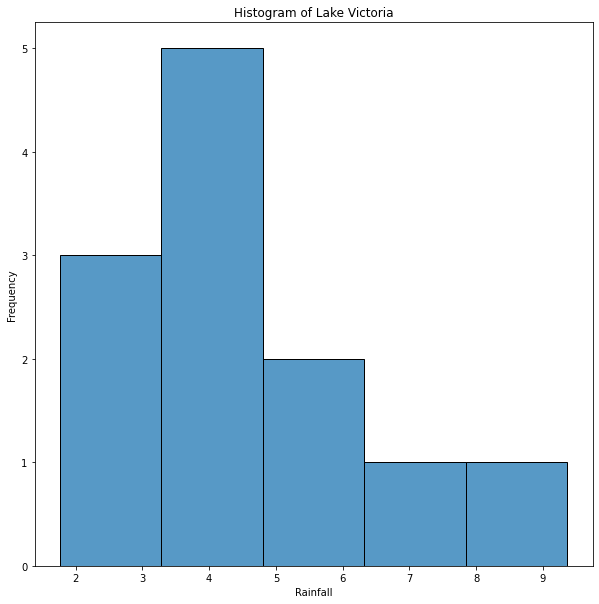

In [48]:
plt.figure(figsize=(10,10))
sns.histplot(x="Lake Victoria", data=df)
plt.title("Histogram of Lake Victoria")
plt.xlabel("Rainfall")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Month', ylabel='Simiyu'>

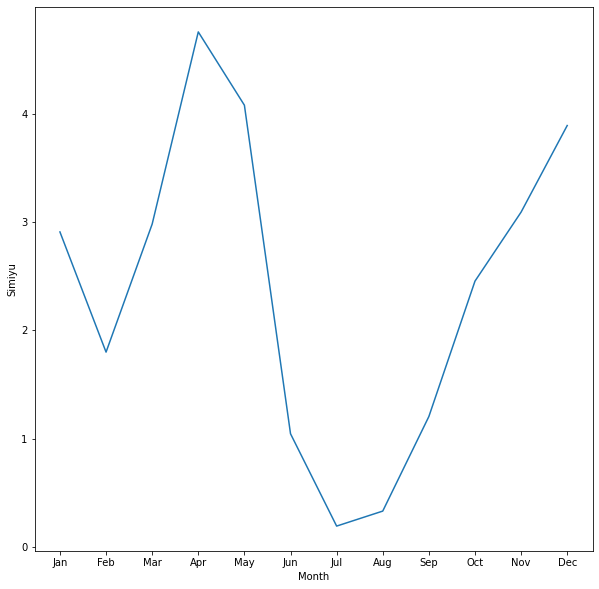

In [49]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Month", y="Simiyu", data=df)


Text(0, 0.5, 'Rainfall')

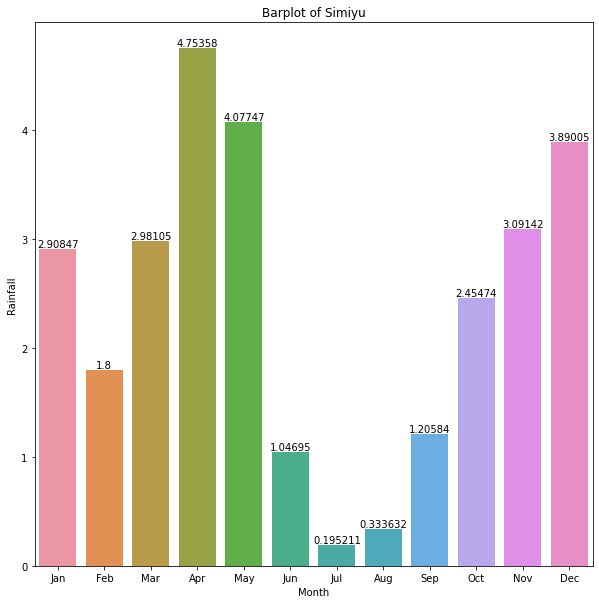

In [51]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Month", y="Simiyu", data=df)
ax.bar_label(ax.containers[0], rotation=0)
ax.set_title("Barplot of Simiyu")
ax.set_xlabel("Month")
ax.set_ylabel("Rainfall")


In [52]:
df.columns

Index(['Lake Victoria', 'Simiyu', 'Month', 'Period'], dtype='object')

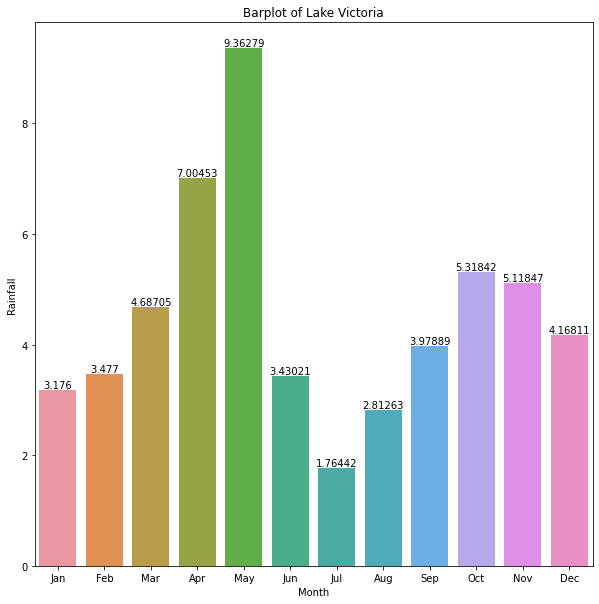

In [53]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Month", y="Lake Victoria", data=df)
ax.bar_label(ax.containers[0], rotation=0)
ax.set_title("Barplot of Lake Victoria")
ax.set_xlabel("Month")
ax.set_ylabel("Rainfall")
plt.show()
